# 1 Task 1: [5 points, 1.25 each]

In this task, you’ll use time-series forecasting to forecast store sales on data from Corporaci ́on Favorita, a large Ecuadorian-based grocery retailer [Data on Kaggle]. Specifically, you’ll build a model that accurately predicts the unit sales for thousands of items sold at different Favorita stores. You’ll practice your machine learning and time series analysis skills with an ap- proachable training dataset of dates, store, and item information, promo- tions, and unit sales.


# Exercise 1.
Load oil.csv. This file contains years worth of data of the daily oil price. However, the data is missing for a few days. Make sure that every day contains a value using any data imputation technique that you learned during the data preparation week or during the missing values imputation week.

In [40]:
import pandas as pd
#Loading oil price data
df = pd.read_csv("data/oil.csv")
df

#Filling gaps of empty prices with the next day price
df = df.fillna(method = 'bfill', limit = 100000)
df_oil = df.copy()
df_oil.iloc[225:250]

,date,dcoilwtico
225,2013-11-12,93.12
226,2013-11-13,93.91
227,2013-11-14,93.76
228,2013-11-15,93.80
229,2013-11-18,93.03
230,2013-11-19,93.35
231,2013-11-20,93.34
232,2013-11-21,95.35
233,2013-11-22,94.53
234,2013-11-25,93.86


# Exercise 2.
Augment the data in test.csv and train.csv with the oil price

In [41]:
#Loading training dataset
train = pd.read_csv("data/train.csv")

#Merging to add oil price to the train set
df_train = pd.merge(train,df_oil, how= "left")
df_train


#Test data is treated and augmented in a step further
#40 products
#54 stores

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,93.14
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,93.14
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,93.14
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,93.14
4,4,2013-01-01,1,BOOKS,0.000000,0.0,93.14
...,...,...,...,...,...,...,...
1248549,1248549,2014-12-03,40,PLAYERS AND ELECTRONICS,5.000000,3.0,67.30
1248550,1248550,2014-12-03,40,POULTRY,102.687996,13.0,67.30
1248551,1248551,2014-12-03,40,PREPARED FOODS,58.000000,6.0,67.30
1248552,1248552,2014-12-03,40,PRODUCE,948.349000,87.0,67.30


# Exercise 3.
Note that the training set contains a ‘sales’ column while the test set does not. Use the training set to train a model of your choice and use that model to predict which values for sales should be in the test set. You can try training multiple models and compare their accuracy later.

# Feature Engineering

In [42]:
#Converting date string to date format
df = df_train.copy()
df["date"] =  pd.to_datetime(df['date'])

#Gettin previous year sales
df['Previous_year_sales'] = df.groupby([df['date'].dt.month,df['date'].dt.day,df['family'],df["store_nbr"] ])['sales'].shift()
df['Previous_year_promotion'] = df.groupby([df['date'].dt.month,df['date'].dt.day,df['family'],df["store_nbr"] ])['onpromotion'].shift()
#Sales to promotion ratio
df['Previous_year_sales/promo'] = df['Previous_year_sales'] / (df['Previous_year_promotion'] +1)

#Gettin previous 28 day sales
df['Previous_28day_sales'] = df.groupby([df['family'],df["store_nbr"] ])['sales'].shift(28)
df['Previous_28day_promotion'] = df.groupby([df['family'],df["store_nbr"] ])['onpromotion'].shift(28)
#Sales to promotion ratio
df['Previous_28day_sales/promo'] = df['Previous_28day_sales']/ (df['Previous_28day_promotion']+1 )




#Gettin previous 21 day sales
df['Previous_21day_sales'] = df.groupby([df['family'],df["store_nbr"] ])['sales'].shift(21)
df['Previous_21day_promotion'] = df.groupby([df['family'],df["store_nbr"] ])['onpromotion'].shift(21)
#Sales to promotion ratio
df['Previous_21day_sales/promo'] = df['Previous_21day_sales']/ (df['Previous_21day_promotion']+1 )

import numpy as np
from datetime import date
#Addig season of the year 
df.loc[(df['date'].dt.month == 1) | (df['date'].dt.month == 2 ) | (df['date'].dt.month == 12 ) ,  "season"] = 1
df.loc[(df['date'].dt.month == 3) | (df['date'].dt.month == 4 ) | (df['date'].dt.month == 5 ) ,  "season"] = 3
df.loc[(df['date'].dt.month == 6) | (df['date'].dt.month == 7 ) | (df['date'].dt.month == 8 ) ,  "season"] = 4
df.loc[(df['date'].dt.month == 9) | (df['date'].dt.month == 10 ) | (df['date'].dt.month == 11 ) ,  "season"] = 2
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_promotion,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_promotion,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_promotion,Previous_21day_sales/promo,season
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0.0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,2013-01-01,1,BABY CARE,0.000000,0.0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,2013-01-01,1,BEAUTY,0.000000,0.0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,2013-01-01,1,BEVERAGES,0.000000,0.0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,2013-01-01,1,BOOKS,0.000000,0.0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248549,1248549,2014-12-03,40,PLAYERS AND ELECTRONICS,5.000000,3.0,67.30,0.000,0.0,0.000,2.000,2.0,0.666667,2.000,2.0,0.666667,1.0
1248550,1248550,2014-12-03,40,POULTRY,102.687996,13.0,67.30,137.216,0.0,137.216,126.939,14.0,8.462600,123.879,11.0,10.323250,1.0
1248551,1248551,2014-12-03,40,PREPARED FOODS,58.000000,6.0,67.30,36.000,0.0,36.000,62.000,7.0,7.750000,58.000,8.0,6.444444,1.0
1248552,1248552,2014-12-03,40,PRODUCE,948.349000,87.0,67.30,0.000,0.0,0.000,916.058,87.0,10.409750,732.899,84.0,8.622341,1.0


In [43]:
import numpy as np
df_train = df.copy()
#We will train only with last 100k tuples
df_train = df_train.tail(100000)

#Dropping missing values 
df_train.dropna(inplace = True)
df_train

#Dropping inf and na
df_train = df_train[~df_train.isin([np.nan, np.inf, -np.inf]).any(1)]

#Reset index
df_train.reset_index(inplace = True, drop = True)

#Dropping unwanted rows discoverd by analisys
df_train.drop(["id", "date","family", "store_nbr","Previous_year_promotion",
             "Previous_28day_promotion", "Previous_21day_promotion","season"],axis = 1,inplace = True)
df_train
 

,sales,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_sales/promo
0,9.000000,4.0,87.29,5.000,5.000,10.000,1.428571,3.000,0.750000
1,0.000000,0.0,87.29,0.000,0.000,0.000,0.000000,0.000,0.000000
2,92.806000,12.0,87.29,159.968,159.968,129.883,8.658867,187.552,11.722000
3,42.000000,19.0,87.29,78.000,78.000,38.000,1.900000,58.000,3.411765
4,0.000000,0.0,87.29,0.000,0.000,0.000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...
71482,2.000000,1.0,67.30,0.000,0.000,0.000,0.000000,2.000,0.666667
71483,5.000000,3.0,67.30,0.000,0.000,2.000,0.666667,2.000,0.666667
71484,102.687996,13.0,67.30,137.216,137.216,126.939,8.462600,123.879,10.323250
71485,58.000000,6.0,67.30,36.000,36.000,62.000,7.750000,58.000,6.444444


# Feature Importance

In [44]:
#Lasso coeficients
#For feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
#Capture dependent feauture
y_train = df_train["sales"]

#Drop dependents features and unwanted columns from dataset
x_train = df_train.drop("sales", axis=1)

#Traning Lasso model
model= Lasso(alpha= .1) #Remember to set the same seed to test and train 
model.fit(x_train,y_train)


importance = abs(model.coef_)
# summarize feature importance
col = x_train.columns
join = list(zip(col, importance))
join= pd.DataFrame(join, columns= ["Feature", "Importance Score"])
sort= join.sort_values(by= ["Importance Score"], ascending=False)
sort.head(50)



,Feature,Importance Score
7,Previous_21day_sales/promo,2.917737e+00
5,Previous_28day_sales/promo,2.159333e+00
4,Previous_28day_sales,6.318932e-01
0,onpromotion,3.008937e-01
6,Previous_21day_sales,2.796507e-01
2,Previous_year_sales,8.404517e-02
1,dcoilwtico,4.362848e-02
3,Previous_year_sales/promo,4.881559e-16


# Prediction in train set

absolute average mean error 53.173817547754645
residual dev 221.88360365609725
r2 = 0.9464431709908835


,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_sales/promo,sales,predicted,diferencia
71437,1.0,67.3,0.000000,0.000000,2.000,0.666667,0.000,0.000000,1.000000,0.000000,-1.000000
71438,7.0,67.3,0.000000,0.000000,20.000,2.222222,19.000,1.727273,16.000000,16.884481,0.884481
71439,5.0,67.3,0.000000,0.000000,2.000,0.666667,1.000,0.500000,5.000000,0.000000,-5.000000
71440,0.0,67.3,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
71441,46.0,67.3,0.000000,0.000000,253.000,4.517857,153.000,3.558140,272.000000,213.708589,-58.291411
71442,10.0,67.3,0.000000,0.000000,21.000,1.750000,10.000,1.250000,15.000000,15.529327,0.529327
71443,3.0,67.3,5.000000,5.000000,16.000,3.200000,8.000,1.600000,9.000000,8.014704,-0.985296
71444,4.0,67.3,14.000000,14.000000,2.000,1.000000,5.000,1.250000,8.000000,3.115874,-4.884126
71445,21.0,67.3,42.000000,42.000000,37.000,2.312500,39.000,3.250000,122.000000,45.210066,-76.789934
71446,1.0,67.3,0.000000,0.000000,1.000,0.500000,1.000,0.500000,1.000000,0.000000,-1.000000


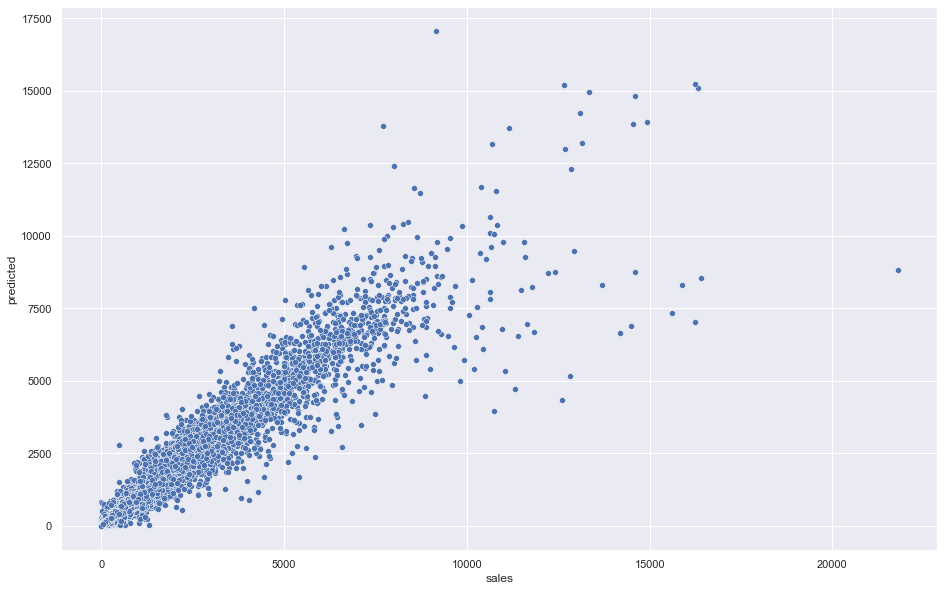

In [45]:
import math
#Makig the prediction in the train set
predict = model.predict(x_train)

#Creating the results dataset
res = x_train.copy()
res["sales"]= y_train 
res["predicted"]= predict

#Fixing under 0 predictios as 0
res.loc[res["predicted"] <0,  "predicted"] = 0

#Adding residuals columns
res["diferencia"] = res["predicted"] - res["sales"] 

#Calculating some performance metrics
absmean = sum(abs(res["diferencia"])) /len(res)
dev = math.sqrt((sum((res["predicted"] - res["sales"]) * (res["predicted"] - res["sales"]) ))/ (len(res)-2) )
print("absolute average mean error",absmean)
print("residual dev",dev)
from sklearn.metrics import r2_score
r = coefficient_of_dermination = r2_score(res["sales"], res["predicted"])
print("r2 =",r)

#Plotting real vs predicted
import seaborn as sns
lm = sns.scatterplot(data= res, x="sales", y= "predicted")
sns.set(rc={'figure.figsize':(15.7,10)})

#Showing results dataframe
res.tail(50)



# Treating test set

Now we have to treat the test set as training set was treated

In [46]:
#Importig train set
train = pd.read_csv("data/train.csv")
#Importig test set
test = pd.read_csv("data/test.csv")

#Joining test and train set in one dataset
df_complete =pd.concat([train,test])
#Adding oil price
df_complete = pd.merge(df_complete,df_oil, how= "left")
df = df_complete.copy()


#Date format
df["date"] =  pd.to_datetime(df['date'])
#Gettin previous year sales
df['Previous_year_sales'] = df.groupby([df['date'].dt.month,df['date'].dt.day,df['family'],df["store_nbr"] ])['sales'].shift()
df['Previous_year_promotion'] = df.groupby([df['date'].dt.month,df['date'].dt.day,df['family'],df["store_nbr"] ])['onpromotion'].shift()
#Sales to promotion ratio
df['Previous_year_sales/promo'] = df['Previous_year_sales'] / (df['Previous_year_promotion'] +1)

#Getting 28 days before sales
df['Previous_28day_sales'] = df.groupby([df['family'],df["store_nbr"] ])['sales'].shift(28)
df['Previous_28day_promotion'] = df.groupby([df['family'],df["store_nbr"] ])['onpromotion'].shift(28)
#Sales to promotion ratio
df['Previous_28day_sales/promo'] = df['Previous_28day_sales']/ (df['Previous_28day_promotion']+1 )


#Gettin previous 21 day sales
df['Previous_21day_sales'] = df.groupby([df['family'],df["store_nbr"] ])['sales'].shift(21)
df['Previous_21day_promotion'] = df.groupby([df['family'],df["store_nbr"] ])['onpromotion'].shift(21)
#Sales to promotion ratio
df['Previous_21day_sales/promo'] = df['Previous_21day_sales']/ (df['Previous_21day_promotion']+1 )

#Adding seasons
df.loc[(df['date'].dt.month == 1) | (df['date'].dt.month == 2 ) | (df['date'].dt.month == 12 ) ,  "season"] = 1
df.loc[(df['date'].dt.month == 3) | (df['date'].dt.month == 4 ) | (df['date'].dt.month == 5 ) ,  "season"] = 3
df.loc[(df['date'].dt.month == 6) | (df['date'].dt.month == 7 ) | (df['date'].dt.month == 8 ) ,  "season"] = 4
df.loc[(df['date'].dt.month == 9) | (df['date'].dt.month == 10 ) | (df['date'].dt.month == 11 ) ,  "season"] = 2


#Droppinng sales column of the train
df.drop("sales", axis = 1, inplace = True)

#Removing train set data
import numpy as np
df_test = df.copy()
df_test= df_test.tail(len(test))

#Dropping unwanted rows discoverd by analisys
df_test.drop(["Previous_year_promotion",
             "Previous_28day_promotion", "Previous_21day_promotion", "season"],axis = 1,inplace = True)

#Dropping missing values 
df_test.dropna(inplace = True)
df_test

#Dropping inf and missing 
df_test = df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]

#Reset index
df_test.reset_index(inplace = True, drop = True)

#We have now a ready test dataset
df_test


,id,date,store_nbr,family,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_sales/promo
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,46.80,0.000,0.000000,3.00000,1.500000,0.000000,0.000000
1,3000889,2017-08-16,1,BABY CARE,1.0,46.80,0.000,0.000000,0.00000,0.000000,0.000000,0.000000
2,3000890,2017-08-16,1,BEAUTY,8.0,46.80,2.000,0.666667,2.00000,0.666667,0.000000,0.000000
3,3000891,2017-08-16,1,BEVERAGES,560.0,46.80,1072.000,7.243243,1898.00000,7.941423,1901.000000,8.158798
4,3000892,2017-08-16,1,BOOKS,1.0,46.80,0.000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
21379,3029395,2017-08-31,9,POULTRY,54.0,47.26,852.336,40.587429,527.79803,31.046943,472.010000,22.476667
21380,3029396,2017-08-31,9,PREPARED FOODS,10.0,47.26,94.389,7.260692,62.78900,5.708091,48.336998,4.394273
21381,3029397,2017-08-31,9,PRODUCE,302.0,47.26,0.000,0.000000,1202.12600,10.544965,919.054000,7.855162
21382,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,15.0,47.26,0.000,0.000000,4.00000,1.333333,5.000000,1.250000


In [47]:
import math
#Importig results to compare
results = pd.read_csv("data/submission.csv")

#Addinng results to the test dataset
df_test_joined= pd.merge(df_test,results, how= "left")
df_test_joined



#Capture dependent feauture
y_test = df_test_joined["sales"]

#Drop dependents features and unwanted columns from dataset
x_test = df_test_joined.drop(["sales","id","date","family", "store_nbr"], axis=1)
x_test


#Storing information of the products
ids= df_test_joined[["sales","id","date","family", "store_nbr"]]


# Predicting on the test set

absolute average mean error 120.65683773705443
residual dev 419.09961701612565
r2 = 0.8582725999253006


,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_sales/promo,sales,predicted,diferencia
21334,43.0,47.26,0.000,0.000000,12.00000,1.200000,22.000000,2.000000,41.916486,27.377841,-14.538645
21335,1.0,47.26,2.000,1.000000,0.00000,0.000000,0.000000,0.000000,0.361975,0.000000,-0.361975
21336,105.0,47.26,0.000,0.000000,242.00000,4.321429,213.000000,4.096154,284.101008,244.157790,-39.943218
21337,21.0,47.26,0.000,0.000000,48.00000,3.200000,19.000000,1.727273,23.621804,37.552968,13.931164
21338,22.0,47.26,12.000,4.000000,10.00000,3.333333,11.000000,1.833333,33.057161,12.634803,-20.422358
21339,20.0,47.26,15.000,1.666667,12.00000,1.714286,17.000000,2.833333,25.885826,21.640642,-4.245183
21340,64.0,47.26,0.000,0.000000,138.00000,7.263158,170.000000,8.095238,138.054923,159.395377,21.340454
21341,6.0,47.26,0.000,0.000000,4.00000,1.333333,4.000000,1.333333,18.270053,3.922846,-14.347207
21342,82.0,47.26,572.097,12.436891,508.08400,11.547364,353.718000,9.069692,363.092752,491.716054,128.623303
21343,148.0,47.26,552.000,7.263158,235.00000,4.272727,205.000000,3.203125,257.170691,294.328237,37.157546


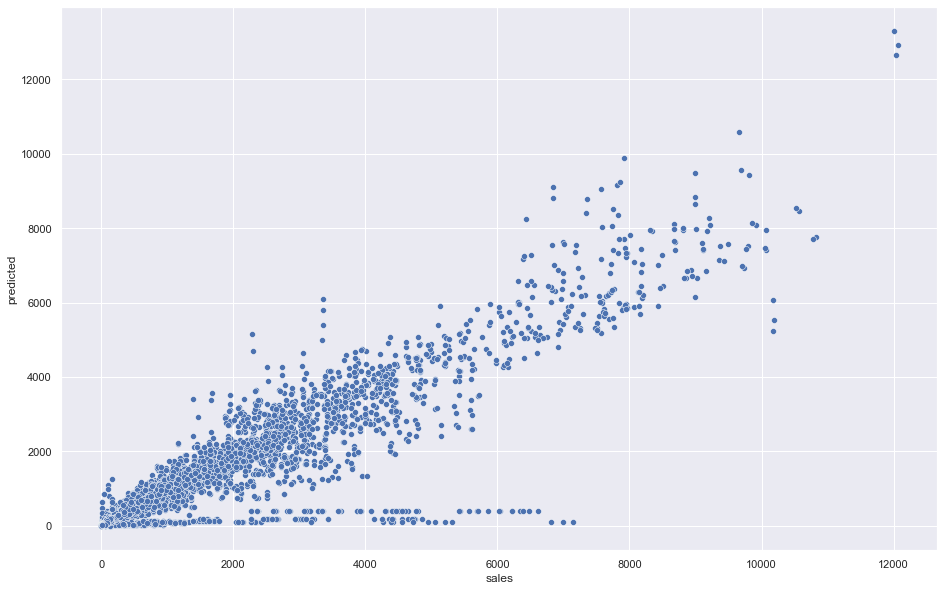

In [48]:
#Predicting on the test set
predict = model.predict(x_test)
res = x_test.copy()

#Adding real sales 
res["sales"]= y_test
#Adding the linear Lasso model prediction
res["predicted"]= predict

#Cuttinng negative predictions to 0
res.loc[res["predicted"] <0,  "predicted"] = 0

#Calculating residuals
res["diferencia"] = res["predicted"] - res["sales"] 

#Calculating metrics of evaluation
absmean = sum(abs(res["diferencia"])) /len(res)
dev = math.sqrt((sum((res["predicted"] - res["sales"]) * (res["predicted"] - res["sales"]) ))/ (len(res)-2) )
print("absolute average mean error",absmean)
print("residual dev",dev)
from sklearn.metrics import r2_score
r = coefficient_of_dermination = r2_score(res["sales"], res["predicted"])
print("r2 =",r)

#Plotting real vs predicted
import seaborn as sns
lm = sns.scatterplot(data= res, x="sales", y= "predicted")
sns.set(rc={'figure.figsize':(15.7,10)})

#Show results df
res.tail(50)


# Some extra insights from results

In [49]:
#Getting mean residuals by product
join = pd.concat([ids,res],axis = 1)
join
df_date = join.groupby("family").mean()
df_date
join

,sales,id,date,family,store_nbr,onpromotion,dcoilwtico,Previous_year_sales,Previous_year_sales/promo,Previous_28day_sales,Previous_28day_sales/promo,Previous_21day_sales,Previous_21day_sales/promo,sales,predicted,diferencia
0,4.309557,3000888,2017-08-16,AUTOMOTIVE,1,20.0,46.80,0.000,0.000000,3.00000,1.500000,0.000000,0.000000,4.309557,2.154726,-2.154831
1,0.000000,3000889,2017-08-16,BABY CARE,1,1.0,46.80,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.998301,3000890,2017-08-16,BEAUTY,1,8.0,46.80,2.000,0.666667,2.00000,0.666667,0.000000,0.000000,3.998301,0.000000,-3.998301
3,2417.365382,3000891,2017-08-16,BEVERAGES,1,560.0,46.80,1072.000,7.243243,1898.00000,7.941423,1901.000000,8.158798,2417.365382,1993.683398,-423.681985
4,0.482959,3000892,2017-08-16,BOOKS,1,1.0,46.80,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.482959,0.000000,-0.482959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,336.982537,3029395,2017-08-31,POULTRY,9,54.0,47.26,852.336,40.587429,527.79803,31.046943,472.010000,22.476667,336.982537,549.393299,212.410761
21380,93.747146,3029396,2017-08-31,PREPARED FOODS,9,10.0,47.26,94.389,7.260692,62.78900,5.708091,48.336998,4.394273,93.747146,62.091057,-31.656089
21381,1267.738442,3029397,2017-08-31,PRODUCE,9,302.0,47.26,0.000,0.000000,1202.12600,10.544965,919.054000,7.855162,1267.738442,1105.108539,-162.629903
21382,60.190128,3029398,2017-08-31,SCHOOL AND OFFICE SUPPLIES,9,15.0,47.26,0.000,0.000000,4.00000,1.333333,5.000000,1.250000,60.190128,6.667395,-53.522733


[(-100.0, 250.0)]

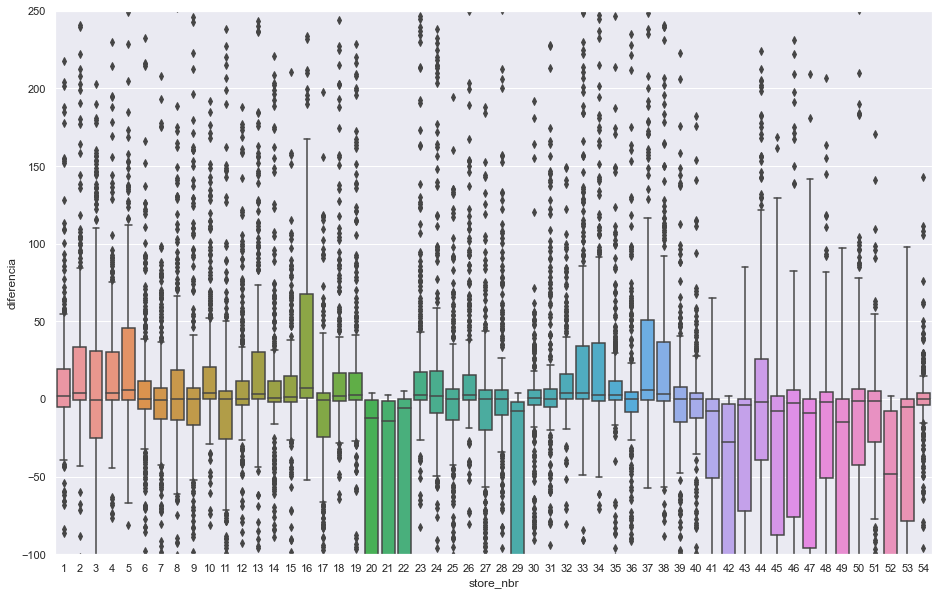

In [50]:
#Getting residual by store
ax = sns.boxplot(data=join, x="store_nbr", y="diferencia")
ax.set(ylim=(-100, 250))

# Exercise 4.
Compare your prediction with the prediction found in submission.csv with 3 different methods:
- Root Mean Square Error (RMSE)
- Mean absolute deviation
- Another metric of your choice


Compare the three errors. Are they in agreement? Do you think any of the
methods is objectively better than the others in this case?

In [51]:
import math
#Calculating MAE
absmean = sum(abs(res["diferencia"])) /len(res)
print("MAD = ", absmean) 
#Calculating MSE
mse = sum((res["diferencia"] * res["diferencia"])) /len(res)
print("MSE = ", mse) 
#Calculating RMSE
rmse = math.sqrt(sum((res["diferencia"] * res["diferencia"])) /len(res))
print("RMSE = ", rmse) 
#Calculating TS
ts= sum((res["diferencia"])) / absmean 
print("Tracking signal = ", ts) 


MAD =  120.65683773705443
MSE =  175628.06132790205
RMSE =  419.08001781032465
Tracking signal =  -13063.262705129537


We think that for this case, rmse is a good indicator because it penalises more the big numbers (big residuals) by squaring them, so you have a more realistic metric of how simetric are your results.

Also tracking signal is a good metric for this case because it indicates you if your model tends to estimate or overestimate with its sign

# Task 2: [5 points, 1.25 each]

Machine Learning (ML) algorithms are used in a wide range of applications,
which affected societies either directly or indirectly in daily life. ML algorithms are preferred for many tasks that require complex computations with
big volumes of data due to the better performance compared to humans.
Moreover, people have subjective opinions and points of view, which can
lead to bias in their decisions. Unfortunately, ML algorithms are not always
objective either. Using ML algorithms in several decision-making systems
and other services may cause serious discrimination among some groups of
people in society. One of the most significant reasons behind the biased predictions of the algorithms for different demographic groups is the imbalanced
representation of each demographic subgroup in the population.
In this task, you will determine the bias in the data, train an ML model,
determine the bias in the output of the ML model and use bias mitigation
algorithms to improve the ML model’s fairness without affecting much the
values of the performance metrics.
This exercise requires the aif360 package. Make sure to install it. If you
are using linux (may also be applicable to Mac), make sure you install the
build-essential package using your package manager (i.e. this is not a python
package) For windows you may need to install a c++ compiler. However,
using Google colab could be a good idea.
In the zip file ‘data’, there are 3 directories: adult, compass, and german.
Choose the data in one of these directories for the following exercises. German could be a good choice as it is small data and requires shorter running
time.


In [52]:
import pandas as pd #importing necessary libraries
import numpy as np
import random
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from aif360.sklearn import postprocessing
from aif360.sklearn import metrics
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from sklearn.model_selection import train_test_split 


In [53]:
df = pd.read_csv("data/german/german.data", sep = ' ',header = None) #reading dataset
df.head() #looking at dataset

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Preprocess

In [54]:
#Renaming columns
df.rename(columns={0: 'CheckStatus', 1: 'Duration', 2:'History', 3:'Purpose', 4:'Amount', 5:'Savings', 6:'TimeEmployed', 7:'InstallmentRate', 8:'Status&Sex', 9:'Debtor', 10:'TimeResidence', 11:'Property', 12:'Age', 13:'OtherInstallmentPlan', 14:'Housing', 15:'#credits', 16:'JobLevel', 17:'#liablepeople', 18:'Telephone', 19:'ForeignWorker', 20:'Classifier'}, inplace = True)
df.head()

,CheckStatus,Duration,History,Purpose,Amount,Savings,TimeEmployed,InstallmentRate,Status&Sex,Debtor,...,Property,Age,OtherInstallmentPlan,Housing,#credits,JobLevel,#liablepeople,Telephone,ForeignWorker,Classifier
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [55]:
#Implementing sex in seperate column
sex = df['Status&Sex'].replace(to_replace = ['A91', 'A93', 'A94'], value = 1)
sex.replace(['A92', 'A95'], 0, inplace=True) 
sex.value_counts()
df['Sex'] = sex #0 = female, 1 = male

#Because divorced, married, seperated and widowed are not seperable and divorced, seperated and widowed also means single,
#this column doesn't really mean much, which is why we are dropping the status column
df.drop(columns = ['Status&Sex'], inplace=True)

#Converting ordinal and binary variables to numeric
df['History'].replace({'A30':0, 'A31':1, 'A32':2, 'A33':3, 'A34':4}, inplace=True)
df['TimeEmployed'].replace({'A71':0, 'A72':1, 'A73':2,'A74':3,'A75':4}, inplace=True)
df['JobLevel'].replace({'A171':1,'A172':2,'A173':3,'A174':4},inplace=True)
df['Telephone'].replace({'A191':0,'A192':1}, inplace=True)
df['ForeignWorker'].replace({'A202':0,'A201':1}, inplace=True)

#renaming catergorical values
#CheckStatus, Savings, Property may seem ordinal, but because there is also 'none/unknown' option, we deem it as categorical
df['CheckStatus'].replace({'A11':'0', 'A12':'0-200','A13':'>200', 'A14':'None'}, inplace=True)

df['Purpose'].replace({'A40':'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment','A43': 'radio/television',
                      'A44': 'domestic appliances', 'A45': 'repairs', 'A46': 'education', 'A47': 'vacation',
                       'A48': 'retraining', 'A49':'business', 'A410':'others'}, inplace=True)

df['Savings'].replace({'A61':'<100', 'A62':'100-500', 'A63':'500-1000', 'A64':'1000', 'A65':'unknown'}, inplace=True)

df['Debtor'].replace({'A101':'none', 'A102':'co-applicant', 'A103':'guarantor'}, inplace=True)

df['Property'].replace({'A121':'real estate','A122':'building society savings agreement/life insurance'
                        ,'A123':'Car or other','A124':'Unknown/no property'}, inplace=True)

df['OtherInstallmentPlan'].replace({'A141':'bank','A142':'stores','A143':'none'}, inplace=True)

df['Housing'].replace({'A151':'rent','A152':'own','A153':'for free'}, inplace=True)

#OneHotEncode categorical variables
df = pd.get_dummies(df, columns=['CheckStatus','Purpose','Savings', 'Debtor', 'Property', 'OtherInstallmentPlan', 'Housing'])

df

,Duration,History,Amount,TimeEmployed,InstallmentRate,TimeResidence,Age,#credits,JobLevel,#liablepeople,...,Property_Car or other,Property_Unknown/no property,Property_building society savings agreement/life insurance,Property_real estate,OtherInstallmentPlan_bank,OtherInstallmentPlan_none,OtherInstallmentPlan_stores,Housing_for free,Housing_own,Housing_rent
0,6,4,1169,4,4,4,67,2,3,1,...,0,0,0,1,0,1,0,0,1,0
1,48,2,5951,2,2,2,22,1,3,1,...,0,0,0,1,0,1,0,0,1,0
2,12,4,2096,3,2,3,49,1,2,2,...,0,0,0,1,0,1,0,0,1,0
3,42,2,7882,3,2,4,45,1,3,2,...,0,0,1,0,0,1,0,1,0,0
4,24,3,4870,2,3,4,53,2,3,2,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,2,1736,3,3,4,31,1,2,1,...,0,0,0,1,0,1,0,0,1,0
996,30,2,3857,2,4,4,40,1,4,1,...,0,0,1,0,0,1,0,0,1,0
997,12,2,804,4,4,4,38,1,3,1,...,1,0,0,0,0,1,0,0,1,0
998,45,2,1845,2,4,4,23,1,3,1,...,0,1,0,0,0,1,0,1,0,0


In [56]:
#binning age to get the disparate impact ratio
age_bins = [18, 30, 50, 76]
labels = [1, 2, 3] # 1= 18-30, 2 = 30-50, 3 = 50-75
df['binned_age'] = pd.cut(df['Age'], bins=age_bins, labels=labels)
df.drop(columns = ['Age'],inplace=True)
df

,Duration,History,Amount,TimeEmployed,InstallmentRate,TimeResidence,#credits,JobLevel,#liablepeople,Telephone,...,Property_Unknown/no property,Property_building society savings agreement/life insurance,Property_real estate,OtherInstallmentPlan_bank,OtherInstallmentPlan_none,OtherInstallmentPlan_stores,Housing_for free,Housing_own,Housing_rent,binned_age
0,6,4,1169,4,4,4,2,3,1,1,...,0,0,1,0,1,0,0,1,0,3
1,48,2,5951,2,2,2,1,3,1,0,...,0,0,1,0,1,0,0,1,0,1
2,12,4,2096,3,2,3,1,2,2,0,...,0,0,1,0,1,0,0,1,0,2
3,42,2,7882,3,2,4,1,3,2,0,...,0,1,0,0,1,0,1,0,0,2
4,24,3,4870,2,3,4,2,3,2,0,...,1,0,0,0,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,2,1736,3,3,4,1,2,1,0,...,0,0,1,0,1,0,0,1,0,2
996,30,2,3857,2,4,4,1,4,1,1,...,0,1,0,0,1,0,0,1,0,2
997,12,2,804,4,4,4,1,3,1,0,...,0,0,0,0,1,0,0,1,0,2
998,45,2,1845,2,4,4,1,3,1,1,...,1,0,0,0,1,0,1,0,0,1


# Exercise 1.

Determine which properties you want to consider privileged (e.g. age, gender,
race, etc) and compute the following 3 fairness properties: (Note that these
3 metrics do not require a trained model)
• disparate impact ratio (DI ratio)
• statistical parity difference (P. diff.)
• consistency
What do these numbers tell you about the fairness of the dataset? Would
you say that the dataset is currently fair? If not, what numbers would you
need to see to judge a dataset to be fair?


We consider the following properties as priviliged:
Age, Foreign Worker, Sex

In [57]:
#splitting the df into X (data) and y_true (true target values)
X = df.drop(columns = 'Classifier')
y_true = df['Classifier']

In [58]:
# DI ratio
print('DI-ratio for Sex:', metrics.disparate_impact_ratio(y_true = y_true, 
                              prot_attr = X['Sex'],
                              pos_label=1,
                              priv_group=1))

print('DI-ratio for Age:', metrics.disparate_impact_ratio(y_true = y_true, 
                              prot_attr = X['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('DI-ratio for Foreign Worker:', metrics.disparate_impact_ratio(y_true = y_true, 
                              prot_attr = X['ForeignWorker'],
                              pos_label=1, priv_group=0))

print()

print('P-DIFF for Sex:', metrics.statistical_parity_difference(y_true = y_true, 
                              prot_attr = X['Sex'],
                              pos_label=1,
                              priv_group=1))

print('P-DIFF for Age:', metrics.statistical_parity_difference(y_true = y_true, # 2 and 3 both negative, so 1 unprivileged
                              prot_attr = X['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('P-DIFF for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_true, 
                              prot_attr = X['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Consistency score for df:', metrics.consistency_score(X, y_true)) 

DI-ratio for Sex: 0.8965673282047968
DI-ratio for Age: 0.882808300182776
DI-ratio for Foreign Worker: 0.7765820195726738

P-DIFF for Sex: -0.07480130902290782
P-DIFF for Age: -0.08740137276284565
P-DIFF for Foreign Worker: -0.1992646852459936

Consistency score for df: 0.6823999999999999


The privileged groups in the attributes are: Men (1) in Sex, age group 30-50 (2) in Age, and not foreign worker (0) in ForeignWorker. The Disparate Impact Ratios are between 0.8 and 1.25 for Age and Sex. This is considered fair. However the DI ratio for ForeignWorker is lower than 0.8, meaning that the classifier is not fair in this case, in favor of non foreign workers.
The Demographic Parity Differences are almost all really close to zero, indicating fairness in the classifier. Also they are negative, so the little amount of unfairness is against the unprivileged group. Only the DP difference for ForeignWorker is larger. This could be explained by the ratio of non foreign workers to foreign workers in the dataset:

In [59]:
print(df['ForeignWorker'].value_counts())

1    963
0     37
Name: ForeignWorker, dtype: int64


You can see here that the ratio of foreign worker/non foreign worker is 963/37.

The consistency over the dataset is around 0.7, indicating that it is averagely consistent.

Overall we deem the dataset to be pretty fair. There is some unfairness within the ForeignWorker attribute and the consistency could have been higher. After this we will see if predicted values from a logistic regression will yield better results and if we can mitigate the bias.

# Exercise 2.
Split the data into a 30/70 test and training set using stratification. Train
a model using the training set and compute values the following 2 fairness
metrics (in addition to the values of the previous 3 metrics (DI Ratio, P diff.
and consistency)):
• Equalized odds
• Predictive parity
What do these results tell you? Compute the accuracy of the model.


In [60]:
#Portected column properties
print((df['Sex'].value_counts() / len(df)).sort_values(ascending=False)) #0 = female 1= male
print()
print((df['binned_age'].value_counts() / len(df)).sort_values(ascending=False)) # 1= 18-30, 2 = 30-50, 3 = 50-75
print()
print((df['ForeignWorker'].value_counts() / len(df)).sort_values(ascending=False)) # 0 = Native, 1 = Foreign

1    0.69
0    0.31
Name: Sex, dtype: float64

2    0.476
1    0.411
3    0.113
Name: binned_age, dtype: float64

1    0.963
0    0.037
Name: ForeignWorker, dtype: float64


In [61]:
#initializestratifycolumn
df['Stratify'] = df['Sex'].astype(str)+ " "+df['binned_age'].astype(str)+" "+df['ForeignWorker'].astype(str)

print((df['Stratify'].value_counts() / len(df)).sort_values(ascending=False)) # 0 = Native, 1 = Foreign

1 2 1    0.365
1 1 1    0.219
0 1 1    0.178
0 2 1    0.090
1 3 1    0.076
0 3 1    0.035
1 2 0    0.018
1 1 0    0.010
0 1 0    0.004
0 2 0    0.003
1 3 0    0.002
Name: Stratify, dtype: float64


In [62]:
#splitting the df into X (data) and y_true (true target values)
X = df.drop(columns = 'Classifier')
y_true = df['Classifier']

In [63]:
# split test train set
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.3, stratify = X['Stratify'])

In [64]:
print((X_train['Stratify'].value_counts() / len(X_train)).sort_values(ascending=False)) # 0 = Native, 1 = Foreign

1 2 1    0.364286
1 1 1    0.218571
0 1 1    0.178571
0 2 1    0.090000
1 3 1    0.075714
0 3 1    0.035714
1 2 0    0.018571
1 1 0    0.010000
0 1 0    0.004286
0 2 0    0.002857
1 3 0    0.001429
Name: Stratify, dtype: float64


In [65]:
# drop stratify column for regression
X_train.drop(columns=['Stratify'], inplace=True)
X_test.drop(columns =['Stratify'], inplace=True)

# scale data
scale_orig = StandardScaler()

X_train_scaled = scale_orig.fit_transform(X_train)
X_test_scaled = scale_orig.transform(X_test)

y_train = y_train.ravel()
y_test = y_test.ravel()

#Logistic Regression Training for each dataset
log_reg = LogisticRegression() 

#Fitting the training set
log_reg.fit(X_train_scaled, y_train)

#Predicting test set labels
y_test_pred = log_reg.predict(X_test_scaled)
y_test_pred_proba = log_reg.predict_proba(X_test_scaled)


In [66]:
# DI ratio
print('DI-ratio for Sex:', metrics.disparate_impact_ratio(y_true = y_test,y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('DI-ratio for Age:', metrics.disparate_impact_ratio(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))
                                                          
print('DI-ratio for Foreign Worker:', metrics.disparate_impact_ratio(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1, priv_group=0))

print()

print('P-DIFF for Sex:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('P-DIFF for Age:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('P-DIFF for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Consistency score for df:', metrics.consistency_score(X_test, y_test)) 

print()

print('Average odds difference for Sex:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Average odds difference for Age:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Average odds difference for Foreign Worker:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Predictive parity for Sex:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Predictive parity for Age:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Predictive parity for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

DI-ratio for Sex: 0.8858377828629546
DI-ratio for Age: 0.8373741524553113
DI-ratio for Foreign Worker: 0.7854671280276817

P-DIFF for Sex: -0.09385451505016718
P-DIFF for Age: -0.14101821745133847
P-DIFF for Foreign Worker: -0.2145328719723183

Consistency score for df: 0.674

Average odds difference for Sex: -0.06965681913947283
Average odds difference for Age: -0.13984912879095487
Average odds difference for Foreign Worker: -0.27749860413176997

Predictive parity for Sex: -0.09385451505016718
Predictive parity for Age: -0.14101821745133847
Predictive parity for Foreign Worker: -0.2145328719723183


In [67]:
#calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.7533333333333333


After splitting the dataframe using stratification we ran the same logistic regression model. The results of this are mostly the same as in exercise 1, the biases do not really change. This could be explained by the fact that, with stratification, we retain the same ratios in the test and train as as in the full dataset.

# Exercise 3.
Use one of the bias mitigation algorithms that are implemented in aif360 to
improve the model fairness and compute the fairness metrics values. How
have the values of all 5 fairness properties changed? Compute the accuracy
and compare the value with the obtained in the previous question.


In [68]:
biased_df = df.drop(columns='Stratify')
binaryLabelDataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=2,
    df=biased_df,
    label_names=['Classifier'],
    protected_attribute_names=['Sex','binned_age','ForeignWorker'])

In [69]:
di = DisparateImpactRemover(repair_level = 1.0) #!pip install BlackBoxAuditing if module doesnt exist
unbiased_dataset = di.fit_transform(binaryLabelDataset)
unbiased_df = unbiased_dataset.convert_to_dataframe()[0]

In [70]:
#initializestratifycolumn
unbiased_df['Stratify'] = unbiased_df['Sex'].astype(str)+ " "+ unbiased_df['binned_age'].astype(str)+" "+ unbiased_df['ForeignWorker'].astype(str) #adding stratify column
#splitting the df into X (data) and y_true (true target values)
X_unbiased = unbiased_df.drop(columns ='Classifier')
y_unbiased = unbiased_df['Classifier']
# split test train set
X_unbiased_train,X_unbiased_test,y_unbiased_train,y_unbiased_test = train_test_split(X_unbiased, y_unbiased, test_size=0.3, stratify = X_unbiased['Stratify'])

In [71]:
# drop stratify column for regression
X_unbiased_train.drop(columns=['Stratify'], inplace=True)
X_unbiased_test.drop(columns =['Stratify'], inplace=True)

# scale data
scale_orig = StandardScaler()

X_unbiased_train_scaled = scale_orig.fit_transform(X_unbiased_train)
X_unbiased_test_scaled = scale_orig.transform(X_unbiased_test)

y_unbiased_train = y_unbiased_train.ravel()
y_unbiased_test = y_unbiased_test.ravel()

#Logistic Regression Training for each dataset
log_reg = LogisticRegression() 

#Fitting the training set
log_reg.fit(X_unbiased_train_scaled, y_unbiased_train)

#Predicting test set labels
y_unbiased_test_pred = log_reg.predict(X_unbiased_test_scaled)
y_unbiased_test_pred_proba = log_reg.predict_proba(X_unbiased_test_scaled)

In [72]:
# DI ratio
print('DI-ratio for Sex:', metrics.disparate_impact_ratio(y_true = y_unbiased_test,y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('DI-ratio for Age:', metrics.disparate_impact_ratio(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['binned_age'],
                              pos_label=1,
                              priv_group=2))
                                                          
print('DI-ratio for Foreign Worker:', metrics.disparate_impact_ratio(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['ForeignWorker'],
                              pos_label=1, priv_group=0))

print()

print('P-DIFF for Sex:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('P-DIFF for Age:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('P-DIFF for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Consistency score for df:', metrics.consistency_score(X_unbiased_test, y_unbiased_test)) 

print()

print('Average odds difference for Sex:', metrics.average_odds_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Average odds difference for Age:', metrics.average_odds_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Average odds difference for Foreign Worker:', metrics.average_odds_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Predictive parity for Sex:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Predictive parity for Age:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Predictive parity for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_unbiased_test, y_pred = y_unbiased_test_pred, 
                              prot_attr = X_unbiased_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

DI-ratio for Sex: 0.8769433465085639
DI-ratio for Age: 0.8719037508846424
DI-ratio for Foreign Worker: 0.8335640138408305

P-DIFF for Sex: -0.09761705685618727
P-DIFF for Age: -0.10480602200347433
P-DIFF for Foreign Worker: -0.15130544196288143

Consistency score for df: 0.688

Average odds difference for Sex: -0.036000533029916265
Average odds difference for Age: -0.0738912052276108
Average odds difference for Foreign Worker: 0.1793550331525015

Predictive parity for Sex: -0.09761705685618727
Predictive parity for Age: -0.10480602200347433
Predictive parity for Foreign Worker: -0.15130544196288143


We used the Disparate Impact Remover method for an attempt in removing the bias. After applying this method we again split the data and ran a logistic regression model. Computing the various metrics again show little to no difference, depending on the seed used. 

We think that this lack of results is due to the fact that the dataset was already fairly unbiased. Two out of three attributes (Sex and Age) already scored higher than 0.8 for the Disparate Impact Ratio, making a Disparate Impact removal fairly uneventful.

A possible explanation for the bias in ForeignWorker is that the ratio between the classes is very offset. As shown before there are 963 foreign workers, and only 37 non foreign workers. A possible better way of mitigating this bias is by synthetically oversampling the underrepresented class. This is done in the next exercise.

# Exercise 4.
Synthesise a new dataset by oversampling the underrepresented classes. For this, you can use any technique discussed in the lecture such as SMOTE or GANs. Train the model in exactly the same way (as you did in Exercise 2) on this new dataset. How have the values of all 5 fairness measures changed? Compute the accuracy of the model and compare the value with the accuracy value that was obtained in question 2.


In [73]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from numpy import where
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


After Running SMOTE Counter({2: 492, 1: 492})


/var/folders/7f/vjsgyc5s1g109hn4x12_kc240000gn/T/ipykernel_6487/2922418084.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


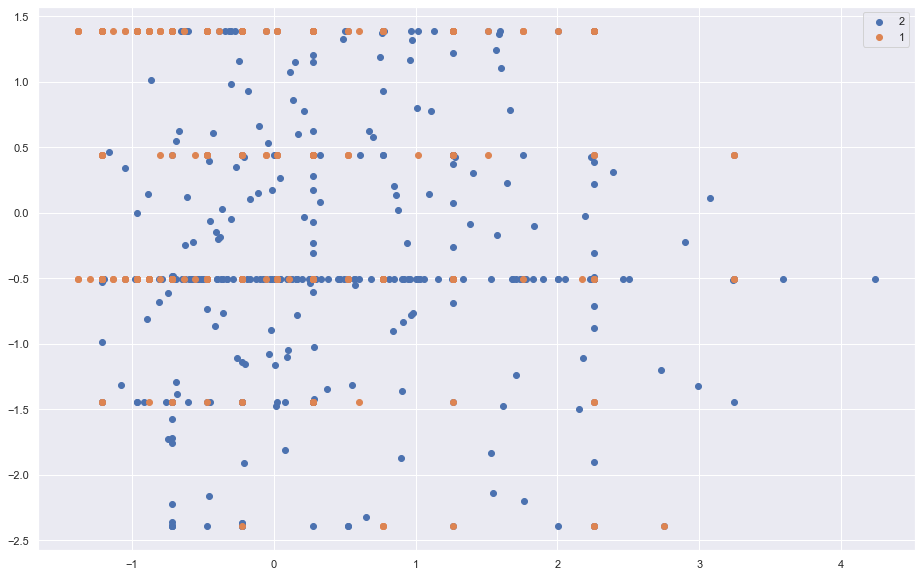

In [74]:
# Oversampling the dataframe
oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train_scaled, y_train)

# summarize the new class distribution
counter = Counter(y_OS)
print("After Running SMOTE", counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_OS == label)[0]
    plt.scatter(X_OS[row_ix, 0], X_OS[row_ix, 1], label=str(label))
plt.legend()
plt.show()


In [75]:
#Logistic Regression Training for each dataset
log_reg = LogisticRegression() 

#Fitting the training set
log_reg.fit(X_OS, y_OS)

#Predicting test set labels
y_test_pred = log_reg.predict(X_test_scaled)
y_test_pred_proba = log_reg.predict_proba(X_test_scaled)


# DI ratio
print('DI-ratio for Sex:', metrics.disparate_impact_ratio(y_true = y_test,y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('DI-ratio for Age:', metrics.disparate_impact_ratio(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))
                                                          
print('DI-ratio for Foreign Worker:', metrics.disparate_impact_ratio(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1, priv_group=0))

print()

print('P-DIFF for Sex:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('P-DIFF for Age:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('P-DIFF for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Consistency score for df:', metrics.consistency_score(X_test, y_test)) 

print()

print('Average odds difference for Sex:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Average odds difference for Age:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Average odds difference for Foreign Worker:', metrics.average_odds_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

print()

print('Predictive parity for Sex:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['Sex'],
                              pos_label=1,
                              priv_group=1))

print('Predictive parity for Age:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['binned_age'],
                              pos_label=1,
                              priv_group=2))

print('Predictive parity for Foreign Worker:', metrics.statistical_parity_difference(y_true = y_test, y_pred = y_test_pred, 
                              prot_attr = X_test['ForeignWorker'],
                              pos_label=1,
                              priv_group=0))

DI-ratio for Sex: 0.7929915639195327
DI-ratio for Age: 0.8430004065591544
DI-ratio for Foreign Worker: 0.6508650519031142

P-DIFF for Sex: -0.13336120401337792
P-DIFF for Age: -0.10320252995412227
P-DIFF for Foreign Worker: -0.3173954073608053

Consistency score for df: 0.674

Average odds difference for Sex: -0.10794356789487647
Average odds difference for Age: -0.08350026619023132
Average odds difference for Foreign Worker: -0.23210496929089897

Predictive parity for Sex: -0.13336120401337792
Predictive parity for Age: -0.10320252995412227
Predictive parity for Foreign Worker: -0.3173954073608053


In [76]:
#calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.71


The DI ratio for foreign workers got worser. This could be explained by the fact that the non foreign workers already were the privileged class in this attribute. Oversampling this class introduces overfitting which results in the DI ratio you can see above.